<a href="https://colab.research.google.com/github/ML-Bioinfo-CEITEC/ECCB2021/blob/main/notebooks/ECCB2021_github_pages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is our CNN example on images from CIFAR-10 database, remember?

# Data

In [1]:
#Official tutorial source: https://www.tensorflow.org/tutorials/images/cnn
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#Creating train, validation and test split
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

valid_images, valid_labels = train_images[45000:], train_labels[45000:]
train_images, train_labels = train_images[:45000], train_labels[:45000]

# Normalize pixel values to be between 0 and 1
train_images, test_images, valid_images = train_images / 255.0, test_images / 255.0, valid_images / 255.0



170500096/170498071 [==============================] - 4s 0us/step


In [2]:
print('TRAIN', train_images.shape)
print('VALID', valid_images.shape)
print('TEST', test_images.shape)

TRAIN (45000, 32, 32, 3)
VALID (5000, 32, 32, 3)
TEST (10000, 32, 32, 3)


label 6


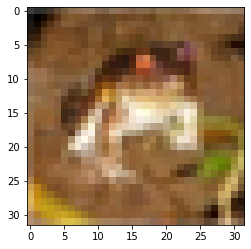

In [3]:
#Showing first training image and its label
plt.imshow(train_images[0])
first_image_label = train_labels[0][0]
print('label', first_image_label)

In [4]:
#source https://www.cs.toronto.edu/~kriz/cifar.html
label_dict = {
    0:'airplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}

print(first_image_label, '=',  label_dict[first_image_label])

6 = frog


# Model

In [5]:
#Defining neural network model
#TODO sync sequential model definitions across notebooks
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='last_conv_layer'))

model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
last_conv_layer (Conv2D)     (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

# Training

In [7]:
#TODO explain sparse CE (in comparison to OHE)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/10
1407/1407 [==============================] - 58s 41ms/step - loss: 1.5872 - accuracy: 0.4174 - val_loss: 1.3907 - val_accuracy: 0.4834
Epoch 2/10
1407/1407 [==============================] - 57s 40ms/step - loss: 1.2138 - accuracy: 0.5686 - val_loss: 1.1283 - val_accuracy: 0.6056
Epoch 3/10
1407/1407 [==============================] - 57s 40ms/step - loss: 1.0598 - accuracy: 0.6258 - val_loss: 1.0300 - val_accuracy: 0.6364
Epoch 4/10
1407/1407 [==============================] - 56s 40ms/step - loss: 0.9578 - accuracy: 0.6629 - val_loss: 0.9436 - val_accuracy: 0.6740
Epoch 5/10
1407/1407 [==============================] - 56s 40ms/step - loss: 0.8845 - accuracy: 0.6896 - val_loss: 0.8970 - val_accuracy: 0.6894
Epoch 6/10
1407/1407 [==============================] - 56s 40ms/step - loss: 0.8237 - accuracy: 0.7105 - val_loss: 0.8502 - val_accuracy: 0.7148
Epoch 7/10
1407/1407 [==============================] - 56s 40ms/step - loss: 0.7768 - accuracy: 0.7286 - val_loss: 0.8322 -

In [8]:
!pip install tensorflowjs
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, "./export_model_skin")

import shutil
shutil.make_archive("export_model_skin", 'zip', "export_model_skin/")

from google.colab import files
files.download('export_model_skin.zip')

     |████████████████████████████████| 71kB 4.9MB/s 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>